# Analyzing StackOverflow's Developer Survey data from 2019

Coding and learning programming languages is getting more and more important as today's business world is getting more and more digitalized. Analyzing the data from StackOverflow's developer survey, I want to get a clearer picture of when today's coders got in touch with coding for the first time.
In the following I want to address four questions:

-Are there differences between continents with regard to the age of first coding experience?

-Are there differences between different age groups when it comes to their first time of coding?

-Is there a difference between gender regarding the age of 1st coding?

-Can we find evidence for a gender pay gap?

In [1]:
#Import packages
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Unzip the survey data
#with zipfile.ZipFile("developer_survey_2019.zip","r") as zip_ref:
#    zip_ref.extractall("developer_survey_2019.csv")

In [4]:
#Read in dataframe
df=pd.read_csv('developer_survey_2019.csv/survey_results_public.csv')

In [5]:
#Check some statistics
print(df.shape)
print(df.info())

(88883, 85)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot        

In [6]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [7]:
#Check numeric variables
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


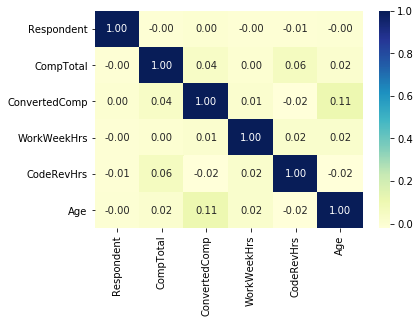

In [8]:
#correlation of numeric variables
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f');

__Variables of interest: Age1stCode, Country__: Difference of 1st age coding across countries/continents? (maybe due to different education systems)

In [9]:
#clean Age column in order to transform it to integer type
df_age=df.dropna(subset=['Age1stCode'], axis=0).copy()
index_to_change=df_age.query('Age1stCode=="Younger than 5 years"').index
df_age.at[index_to_change, 'Age1stCode']='1'
index_to_change=df_age.query('Age1stCode=="Older than 85"').index
df_age.at[index_to_change, 'Age1stCode']='86'
df_age['Age1stCode']=df_age['Age1stCode'].astype(int)

In [10]:
#limit to countries with at least 15 participants
df_age_country= pd.DataFrame(df_age['Country'].value_counts() > 15)
df_age_country=df_age_country.reset_index()
df_age_country=df_age_country.query('Country==True')

In [11]:
#get the mean age of 1st coding experience for those countries
country_list=df_age_country['index'].to_list()
df_age_filtered=df_age[df_age['Country'].isin(country_list)]
df_country=df_age_filtered.groupby('Country')['Age1stCode'].mean().sort_values()

In [12]:
#https://gist.github.com/pamelafox/986163
#import a python file which has continent information for all countries in order to merge the information
from countryinfo import countries

In [13]:
#create a dataframe from the python file input
data=pd.DataFrame()
for i in countries:
    country=pd.DataFrame(i)
    data=data.append(country, ignore_index=True)

In [14]:
#clean dataframe
data.drop_duplicates(subset=['name'], keep='first', inplace=True)
data=data.reset_index(drop=True)

In [15]:
#merge the continent dataframe with our previous df on country information
df_withcontinent=pd.merge(df_country, data, how='left', left_on='Country', right_on='name')

In [16]:
#extract information for visual analysis
continent_means=df_withcontinent.groupby('continent')['Age1stCode'].mean().sort_values(ascending=False).values
continents=df_withcontinent.groupby('continent')['Age1stCode'].mean().sort_values(ascending=False).index

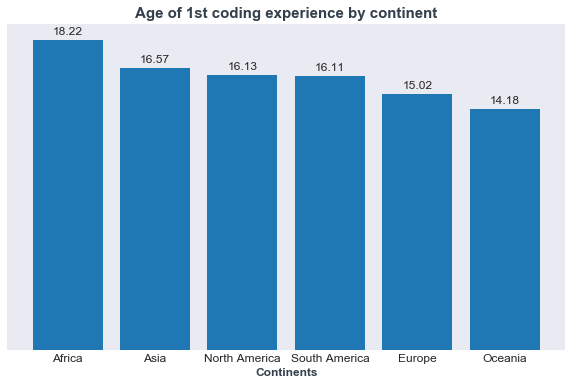

In [20]:
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
#https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html
#bar chart for analyzing the mean age of 1st coding experience by continents
fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('seaborn-dark')
ax.set_xlabel('Continents', fontsize=12, fontweight='black', color = '#333F4B')
ax.tick_params(axis='both', which='major', labelsize=12)
country=ax.bar(continents, continent_means)
ax.set_title('Age of 1st coding experience by continent',fontsize=15, fontweight='black', color = '#333F4B')

def autolabel(continents):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for continent in continents:
        height = continent.get_height()
        ax.annotate('{}'.format(round(height,2)), fontsize=12,
                    xy=(continent.get_x() + continent.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(country)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig('1stcoding_by_continent.png');

__Variables of interest: Age, Age1stCode__: Difference of 1st age coding across the different answer groups? > assumption: gets younger for younger participants (digital natives)

In [21]:
#https://stackoverflow.com/questions/32633977/how-to-create-categorical-variable-based-on-a-numerical-variable
#create buckets from the age variable
df_age['Age_bucketed'] = pd.cut(df_age['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, float('Inf')], labels=['under10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70 and older'])

In [22]:
#Data of under 10 years seems unplausible > drop those rows
index_to_drop=df_age.query('Age <=10').index
df_age.drop(index_to_drop, inplace=True)

In [23]:
#overview of the buckets
df_age['Age_bucketed'].value_counts()

20-30           40419
30-40           21935
10-20            6911
40-50            6645
50-60            2206
60-70             568
70 and older      153
under10             0
Name: Age_bucketed, dtype: int64

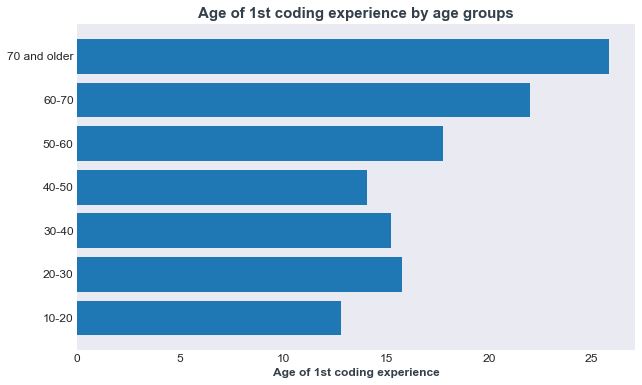

In [24]:
#plot barcharts for age groups and 1st coding experience means
age_bucketed_vals=df_age.groupby('Age_bucketed')['Age1stCode'].mean().values
age_bucketed_idx=df_age.groupby('Age_bucketed')['Age1stCode'].mean().index

fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('seaborn-dark')
ax.set_xlabel('Age of 1st coding experience', fontsize=12, fontweight='black', color = '#333F4B')
ax.tick_params(axis='both', which='major', labelsize=12)
country=ax.barh(age_bucketed_idx, age_bucketed_vals)
ax.set_title('Age of 1st coding experience by age groups',fontsize=15, fontweight='black', color = '#333F4B')
plt.savefig('age1stcoding_by_agegroups');

__Variables of interest: Age1stCode, Gender:__ Difference of gender regarding 1st coding experience?

In [25]:
df_age.Gender.value_counts()

Man                                                            77338
Woman                                                           6272
Non-binary, genderqueer, or gender non-conforming                582
Man;Non-binary, genderqueer, or gender non-conforming            178
Woman;Non-binary, genderqueer, or gender non-conforming          161
Woman;Man                                                        123
Woman;Man;Non-binary, genderqueer, or gender non-conforming       66
Name: Gender, dtype: int64

In [26]:
#clean up gender column by assigning non-"Man" or "Woman" values to bucket "other"
df_gender=df_age.copy()
index_other=df_gender.query('Gender not in ["Man", "Woman"]').index
df_gender.at[index_other, 'Gender']="Other"

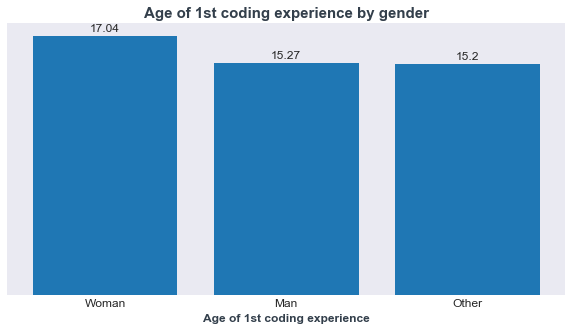

In [27]:
#plot gender vs. age of 1st coding experience
age_bucketed_vals=df_gender.groupby('Gender')['Age1stCode'].mean().sort_values(ascending=False).values
age_bucketed_idx=df_gender.groupby('Gender')['Age1stCode'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('seaborn-dark')
ax.set_xlabel('Age of 1st coding experience', fontsize=12, fontweight='black', color = '#333F4B')
ax.tick_params(axis='both', which='major', labelsize=12)
gender=ax.bar(age_bucketed_idx, age_bucketed_vals)
ax.set_title('Age of 1st coding experience by gender',fontsize=15, fontweight='black', color = '#333F4B')

autolabel(gender)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig('age1stcoding_by_gender');

__Gender__: Can we find evidence for a gender pay gap in the participants of the study?

In [28]:
#what is the share of men and women in the dataset?
count_man=df_gender.query('Gender == "Man"')['Respondent'].count()
count_woman=df_gender.query('Gender == "Woman"')['Respondent'].count()
count_other=df_gender.query('Gender == "Other"')['Respondent'].count()
share_man=count_man/df_gender.shape[0]
share_woman=count_woman/df_gender.shape[0]
share_other=count_other/df_gender.shape[0]
print(share_man)
print(share_woman)
print(share_other)

0.8828740382200507
0.07159980821479943
0.04552615356514989


__performing a t-test for checking whether salaries for men and women are alike__


$$H_0: \mu_{salary_m} - \mu_{salary_f} = 0$$


$$H_0: \mu_{salary_m} - \mu_{salary_f} \neq 0$$

In [29]:
#drop rows that don't have a salary information included
df_gender_filtered=df_gender.dropna(subset=['ConvertedComp'], axis=0).copy()

In [35]:
#because of the different share of men and women in the dataset, I am going to split the dataset into two separate df's
#that I am going to bootstrap from in order to get equal sample sizes
men_means, women_means, diffs = [], [], []

df_men=df_gender_filtered.query('Gender =="Man"')
df_women=df_gender_filtered.query('Gender == "Woman"')

for _ in range(10000):
    bootsamp_men = df_men.sample(200, replace = True)
    men_mean = bootsamp_men['ConvertedComp'].mean()
    bootsamp_women = df_women.sample(200, replace = True)
    women_mean = bootsamp_women['ConvertedComp'].mean()
    # append the info 
    men_means.append(men_mean)
    women_means.append(women_mean)
    diffs.append(men_mean - women_mean)  

print(np.std(men_means))
print(np.std(women_means))
print(np.std(diffs))

20179.559506278623
18365.562147181983
27398.492958617295


In [36]:
print(np.mean(men_means))
print(np.mean(women_means))

127368.6907895
115417.60354849999


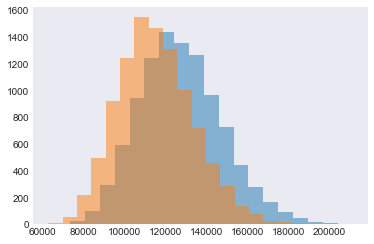

In [37]:
#plot the distribution of men and women means
plt.hist(men_means, alpha = 0.5, bins=20);
plt.hist(women_means, alpha = 0.5, bins=20); 

In [85]:
#Taking samples for the t-test
sample_men=df_men['ConvertedComp'].sample(2000)
sample_women=df_women['ConvertedComp'].sample(2000)
print(np.mean(sample_men), np.std(sample_men))
print(np.mean(sample_women), np.std(sample_women))

120985.3975 266849.53046629264
117786.2755 259743.59874584593


In [86]:
#calculating the t-test
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(sample_men,sample_women)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.7009292381602155
we accept null hypothesis
